In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from analyze import HistoryEntry

In [3]:
log_dir = 'docker_data/hc_profiler_sweep_finished/cifar100+shufflenetv2+bs8+adam+lr0.001+tm0.5+me100+eta0.5+beta2.0+2022112613391669487948'
history_file = f'{log_dir}/history.py'

In [5]:
history = eval(open(history_file).read())
# with open(history_file, "r") as f:
#     eval(f.read())

In [9]:
# TODO: Add learning rate
def convert_HistoryEntry_to_dict(h_entry):
    dict = {
        'batch_size': h_entry.bs, 
        'power_limit': h_entry.pl, 
        'energy': h_entry.energy, 
        'time': h_entry.time, 
        'accuracy': h_entry.accuracy,
        'total_cost': h_entry.total_cost
    }
    return dict

In [10]:
history_list = [convert_HistoryEntry_to_dict(he) for he in history]

In [15]:
history_df = pd.DataFrame(history_list)
history_df

,batch_size,power_limit,energy,time,accuracy,total_cost
0,8,175,97.751086,2.214744,0.011800,3.317713e+03
1,8,150,99.981968,2.172583,0.013100,2.932835e+03
2,8,125,100.771616,2.216342,0.010300,3.804764e+03
3,8,100,97.991159,2.240101,0.011100,3.567004e+03
4,8,175,103.531635,2.139636,0.013100,2.889905e+03
...,...,...,...,...,...,...
79,512,100,104.401827,52.128072,0.026758,2.175263e+06
80,512,175,155.315767,18.265146,0.018555,1.100791e+06
81,512,150,147.155437,18.852906,0.018945,1.112609e+06
82,512,125,122.780849,21.854061,0.018359,1.330220e+06


In [44]:
heatmap_df = history_df.pivot_table(index='batch_size', columns='power_limit', values='total_cost')

In [45]:
heatmap_df

power_limit,100,125,150,175
batch_size,,,,
8,3.530260e+03,3.607626e+03,3219.304360,3221.959437
16,8.305877e+03,6.291254e+03,5911.664731,6326.085174
32,1.456379e+04,1.306516e+04,9032.513154,9700.329352
64,9.348596e+04,3.962302e+04,48163.920144,39222.601732
128,2.144435e+05,8.455489e+04,91339.483726,74303.056751
256,6.789615e+05,2.144476e+05,186417.737613,157955.645740
512,2.146683e+06,1.012744e+06,708783.579403,784428.896917


<AxesSubplot:xlabel='power_limit', ylabel='batch_size'>

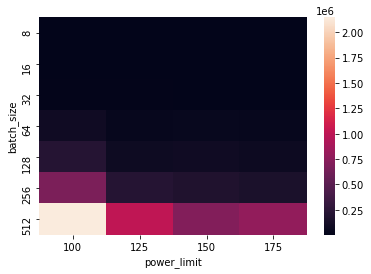

In [46]:
sns.heatmap(heatmap_df)

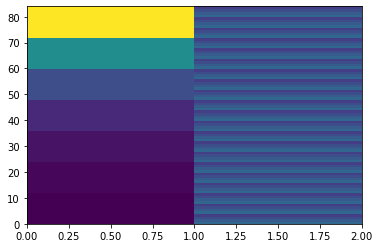

In [42]:
heatmap_df = history_df.filter(['batch_size', 'power_limit'])
plt.pcolor(heatmap_df)

In [35]:
heatmap_df = history_df.filter(['batch_size', 'power_limit', 'total_cost']).groupby(['batch_size', 'power_limit']).unstack(level=0)
# .pivot('energy', 'power_limit', 'total_cost')
heatmap_df

AttributeError: 'DataFrameGroupBy' object has no attribute 'unstack'

<AxesSubplot:>

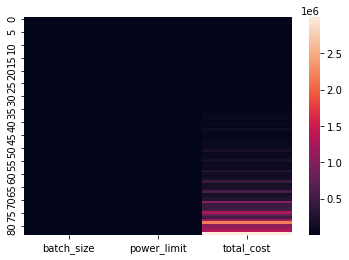

In [18]:
sns.heatmap(heatmap_df)